In [108]:
import numpy as np
import keras as k
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dropout,Input, Dense,merge, Add
from keras import optimizers
from keras.models import Model
import pandas as pd
from keras.models import load_model


In [90]:
random_ = np.loadtxt("./Filon/random.txt")
green_ = np.loadtxt("./Filon/green.txt")
for i in ["Bessel","series"]:
    input_ = np.loadtxt("./"+i+"/random.txt")
    output_ = np.loadtxt("./"+i+"/green.txt")
    random_ = np.append(random_,input_,axis =0)
    green_ =np.append(green_,output_,axis = 0)
    

In [83]:
#testing of code
random_ = np.loadtxt("./test/random.txt")
green_ = np.loadtxt("./test/green.txt")


In [91]:
X = pd.DataFrame(columns=["amu","beta"])
X["amu"] = random_[:,0]
X["beta"] = random_[:,1]
Y = pd.DataFrame(columns=["G","damu","dbeta"])
Y["G"] = green_[:,0]
Y["damu"] = green_[:,1]
Y["dbeta"] = green_[:,2]

In [92]:
Y.max(axis=0)-Y.min(axis=0),X.max(axis=0)-X.min(axis=0)

(G         26.511393
 damu     132.248849
 dbeta    589.331036
 dtype: float64, amu       1.0
 beta    100.0
 dtype: float64)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
random_scale = preprocessing.MinMaxScaler([0,1])
green_scale = preprocessing.MinMaxScaler([0,5])

random_scale.fit(X_train)
green_scale.fit(y_train)
X_train = random_scale.transform(X_train)
X_test = random_scale.transform(X_test)

y_train = green_scale.transform(y_train)
y_test = green_scale.transform(y_test)

In [111]:
Y1,Y2,Y3 =y_train[:,0],y_train[:,1],y_train[:,2]
Y1_,Y2_,Y3_ =y_test[:,0],y_test[:,1],y_test[:,2]

In [112]:
Y1,Y2,Y3 = Y1.reshape(Y1.size,1),Y2.reshape(Y2.size,1),Y3.reshape(Y3.size,1)
Y1_,Y2_,Y3_ = Y1_.reshape(Y1_.size,1),Y2_.reshape(Y2_.size,1),Y3_.reshape(Y3_.size,1)

In [96]:
inputs = Input(shape=(2,))
x = Dense(8, activation='relu')(inputs)
# x = Dense(64, activation='relu')(x)
# x = Dense(64, activation='relu')(x)
# x = Dense(64, activation='relu')(x)
# x = Dense(64, activation='relu')(x)
x = Dense(8, activation='relu')(x)
# x = Dense(64, activation='relu')(x)




x1_ = Dense(8, activation='relu')(x)
x1 = Dense(8, activation='relu')(x1_)
# x1 = Dense(64, activation='relu')(x1)
# x1 = Dense(64, activation='relu')(x1)
# x1 = Dense(64, activation='relu')(x1)
# x1 = Dense(64, activation='relu')(x1)
# x1 = Add()([x1, x1_])
# x1 = Dense(64, activation='relu')(x1)
y1 = Dense(1, activation=None)(x1)

x2_ = Dense(8, activation='relu')(x)
x2 = Dense(8, activation='relu')(x2_)
# x2 = Dense(64, activation='relu')(x2)
# x2 = Dense(64, activation='relu')(x2)
# x2 = Dense(64, activation='relu')(x2)
# x2 = Dense(64, activation='relu')(x2)
# x2 = Dense(64, activation='relu')(x2)
# x2 = Dense(64, activation='relu')(x2)
# x = Dense(64, activation='relu')(x)
# x2 = Add()([x2, x2_])
y2 = Dense(1, activation=None)(x2)

x3_ = Dense(8, activation='relu')(x)
x3 = Dense(8, activation='relu')(x3_)
# x3 = Dense(64, activation='relu')(x3)
# x3 = Dense(64, activation='relu')(x3)
# x3 = Dense(64, activation='relu')(x3)
# x3 = Dense(64, activation='relu')(x3)
# x3 = Dense(64, activation='relu')(x3)
# x3 = Dense(64, activation='relu')(x3)
# x3 = Dense(64, activation='relu')(x3)
# x3 = Add()([x3, x3_])
y3 = Dense(1, activation=None)(x3)

model = Model(inputs=inputs, outputs=[y1,y2,y3])


In [97]:
def time_decay(epoch, initial_lrate):
    decay_rate = 0.01
    new_lrate = initial_lrate/(1+decay_rate*epoch)
    return new_lrate
from keras.callbacks import LearningRateScheduler
lrate = LearningRateScheduler(time_decay,verbose=1)

In [103]:
adam = optimizers.adam(lr=0.001)
model.compile(loss=["mean_squared_error","mean_squared_error","mean_squared_error"], optimizer=adam, metrics=["mean_squared_error"])
history = model.fit([X_train], [Y1,Y2,Y3], epochs=50, batch_size=128,validation_data=([X_test],[Y1_,Y2_,Y3_]),callbacks=[lrate])

Train on 99192 samples, validate on 42511 samples
Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
99192/99192 [==============================] - 8s 83us/step - loss: 0.0805 - dense_156_loss: 0.0449 - dense_159_loss: 0.0202 - dense_162_loss: 0.0154 - dense_156_mean_squared_error: 0.0449 - dense_159_mean_squared_error: 0.0202 - dense_162_mean_squared_error: 0.0154 - val_loss: 0.0790 - val_dense_156_loss: 0.0454 - val_dense_159_loss: 0.0179 - val_dense_162_loss: 0.0157 - val_dense_156_mean_squared_error: 0.0454 - val_dense_159_mean_squared_error: 0.0179 - val_dense_162_mean_squared_error: 0.0157
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0009900990569281696.
99192/99192 [==============================] - 5s 55us/step - loss: 0.0805 - dense_156_loss: 0.0449 - dense_159_loss: 0.0202 - dense_162_loss: 0.0154 - dense_156_mean_squared_error: 0.0449 - dense_159_mean_squared_error: 0.0202 - dense_162_mean_squared_error

Epoch 15/50

Epoch 00015: LearningRateScheduler setting learning rate to 0.0003669118629196626.
99192/99192 [==============================] - 6s 62us/step - loss: 0.0736 - dense_156_loss: 0.0382 - dense_159_loss: 0.0201 - dense_162_loss: 0.0154 - dense_156_mean_squared_error: 0.0382 - dense_159_mean_squared_error: 0.0201 - dense_162_mean_squared_error: 0.0154 - val_loss: 0.0721 - val_dense_156_loss: 0.0387 - val_dense_159_loss: 0.0177 - val_dense_162_loss: 0.0157 - val_dense_156_mean_squared_error: 0.0387 - val_dense_159_mean_squared_error: 0.0177 - val_dense_162_mean_squared_error: 0.0157
Epoch 16/50

Epoch 00016: LearningRateScheduler setting learning rate to 0.00031905380361106086.
99192/99192 [==============================] - 6s 63us/step - loss: 0.0734 - dense_156_loss: 0.0380 - dense_159_loss: 0.0200 - dense_162_loss: 0.0154 - dense_156_mean_squared_error: 0.0380 - dense_159_mean_squared_error: 0.0200 - dense_162_mean_squared_error: 0.0154 - val_loss: 0.0720 - val_dense_156_los

Epoch 29/50

Epoch 00029: LearningRateScheduler setting learning rate to 2.4201574433391215e-05.
99192/99192 [==============================] - 6s 63us/step - loss: 0.0728 - dense_156_loss: 0.0375 - dense_159_loss: 0.0200 - dense_162_loss: 0.0153 - dense_156_mean_squared_error: 0.0375 - dense_159_mean_squared_error: 0.0200 - dense_162_mean_squared_error: 0.0153 - val_loss: 0.0716 - val_dense_156_loss: 0.0382 - val_dense_159_loss: 0.0177 - val_dense_162_loss: 0.0157 - val_dense_156_mean_squared_error: 0.0382 - val_dense_159_mean_squared_error: 0.0177 - val_dense_162_mean_squared_error: 0.0157
Epoch 30/50

Epoch 00030: LearningRateScheduler setting learning rate to 1.8760910060964237e-05.
99192/99192 [==============================] - 6s 64us/step - loss: 0.0728 - dense_156_loss: 0.0375 - dense_159_loss: 0.0200 - dense_162_loss: 0.0153 - dense_156_mean_squared_error: 0.0375 - dense_159_mean_squared_error: 0.0200 - dense_162_mean_squared_error: 0.0153 - val_loss: 0.0716 - val_dense_156_lo

Epoch 43/50

Epoch 00043: LearningRateScheduler setting learning rate to 3.4624715489128356e-07.
99192/99192 [==============================] - 7s 66us/step - loss: 0.0728 - dense_156_loss: 0.0375 - dense_159_loss: 0.0200 - dense_162_loss: 0.0153 - dense_156_mean_squared_error: 0.0375 - dense_159_mean_squared_error: 0.0200 - dense_162_mean_squared_error: 0.0153 - val_loss: 0.0716 - val_dense_156_loss: 0.0382 - val_dense_159_loss: 0.0177 - val_dense_162_loss: 0.0157 - val_dense_156_mean_squared_error: 0.0382 - val_dense_159_mean_squared_error: 0.0177 - val_dense_162_mean_squared_error: 0.0157
Epoch 44/50

Epoch 00044: LearningRateScheduler setting learning rate to 2.421308828651001e-07.
99192/99192 [==============================] - 7s 67us/step - loss: 0.0728 - dense_156_loss: 0.0375 - dense_159_loss: 0.0200 - dense_162_loss: 0.0153 - dense_156_mean_squared_error: 0.0375 - dense_159_mean_squared_error: 0.0200 - dense_162_mean_squared_error: 0.0153 - val_loss: 0.0716 - val_dense_156_los

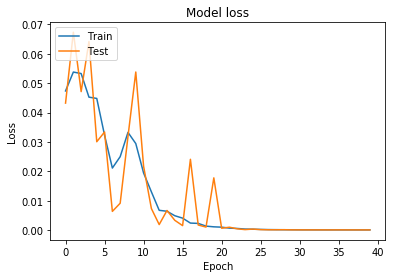

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [40]:
# model.save("latest.h5")

In [109]:
model = load_model("latest.h5")

In [20]:
import time

In [75]:
input_.size

2020202

In [113]:
input_ = random_scale.transform(X)
start = time.time()
output_ = model.predict(input_)
end  = time.time()
print (end -start)
output_ = np.transpose(np.array(output_))
output_ = green_scale.inverse_transform(output_.reshape(output_.shape[1],3))


6.529637098312378


In [44]:
import matplotlib.pyplot as plt


In [144]:
y = np.array(p)

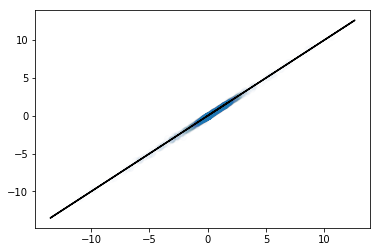

In [149]:
plt.scatter(p["target_1"],p["output_1"],alpha=0.01)
plt.plot(y[:,0],y[:,0],'k-') 


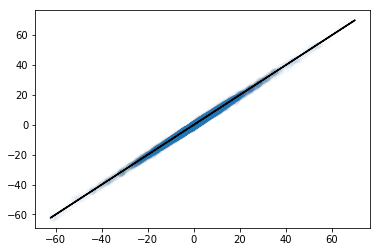

In [45]:
plt.scatter(output_[:,1],y[:,1],alpha=0.01)
plt.plot(y[:,1],y[:,1],'k-') 


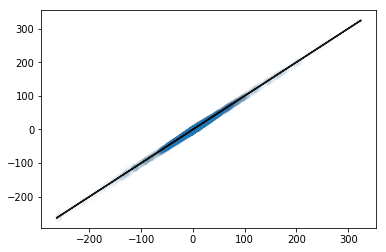

In [46]:
plt.scatter(p["output_"],p["target"],alpha=0.01)
plt.plot(p["target"],p["target"],'k-',alpha =0.9) 


In [131]:
predict = pd.DataFrame(columns=["output_1","output_2","output_3","target_1","target_2","target_3"])

In [135]:
predict["target_1"],predict["target_2"],predict["target_3"]=y[:,0],y[:,1],y[:,2]
predict["output_1"],predict["output_2"],predict["output_3"]= output_[:,0],output_[:,1],output_[:,2]

In [148]:
p = predict.sample(frac=.03)

In [138]:
np.average(np.square(predict["output_1"]-predict['target_1']))

0.0017136866012382433

In [140]:
np.average(np.square(predict["output_2"]-predict['target_2']))

0.02881671240510612

In [142]:
np.average(np.square(predict["output_3"]-predict['target_3']))

0.5433365203294985